In [1]:
import numpy as np

In [5]:
def american_option_vol(s_ini, K, T, r, sig, N, opttype):
    dt = T/N
    u = np.exp(sig*np.sqrt(dt))
    d = np.exp(-sig*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    C = np.zeros([N+1, N+1])
    S = np.zeros([N+1, N+1])
    for i in range(N+1):
        S[N,i] = s_ini* (u**i) * (d**(N-i))
        if opttype=='C':
            C[N,i] = max(S[N,i]-K,0)
        else:
            C[N,i] = max(K-S[N,i],0)
    for i in range(N-1, -1,-1):
        for j in range(0,i+1):
            S[i,j] = s_ini * (u**j) * (d**(i-j))
            if opttype=='C':
                C[i,j] = np.exp(-r*dt)*(p*C[i+1,j+1] + (1-p)*C[i+1, j])
            else:
                euro_price = np.exp(-r*dt)*(p*C[i+1,j+1] + (1-p)*C[i+1, j])
                C[i,j] = max(K-S[i,j], euro_price)
    return C[0,0], S, C

In [7]:
price, C, S = american_option_vol(100, 90, 10, 0, 0.3, 10, "P")
print(price)

29.89924076633092


In [8]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S = american_option_vol(100, 90, 1, 0, 0.3, N, "C")
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


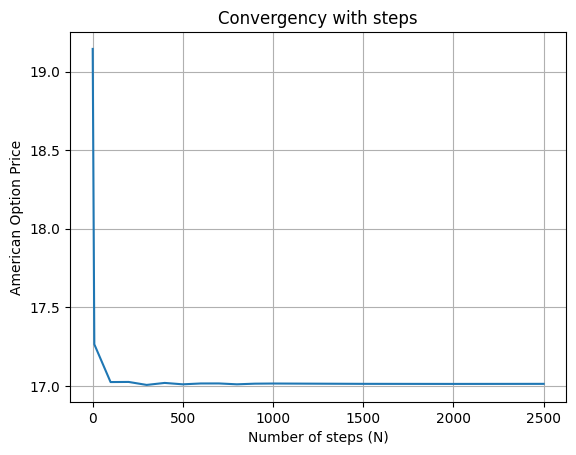

In [9]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Option Price")
plt.grid(True)
plt.show()

# L3 DYNAMIC DELTA HEDGING

In [42]:
def american_option(s_ini, K, T, r, u, d, N, opttype):
    dt= T/N
    p = (np.exp(r*dt)-d)/(u-d)
    O = np.zeros([N+1, N+1])
    S = np.zeros([N+1, N+1])
    Delta = np.zeros([N,N])

    for i in range(N+1):
        S[N,i] = s_ini * (u**i) * (d**(N-i))
        if opttype=='C':
            O[N,i] = max(S[N,i]-K,0)
        else:
            O[N,i] = max(K-S[N,i],0)
    for i in range(N-1, -1, -1):
        for j in range(0,i+1):
            S[i,j] = s_ini * (u**j) * (d**(i-j))
            euro_price = np.exp(-r*dt)*(p*O[i+1, j+1] + (1-p)*O[i+1,j])
            if opttype=='C':
                O[i,j] = max(euro_price, max(S[i,j]-K,0))
                Delta[i,j] = (O[i+1,j+1]-O[i+1,j])/(S[i+1,j+1]-S[i+1,j])
            else:
                O[i,j] = max(euro_price, max(K-S[i,j],0))
                Delta[i,j] = (O[i+1,j+1]-O[i+1,j])/(S[i+1,j+1]-S[i+1,j])
    return O[0,0], O, S, Delta

In [29]:
def european_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [46]:
price_am, C_am, S_am, delta_am = american_option(50, 52, 5, 0.05, 1.2, 0.8, 5, "C")
price_euro, C_euro, S_euro, delta_euro = european_option(50, 52, 5, 0.05, 1.2, 0.8, 5, "C")
C_am>=C_euro

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

# L3 Path Dependent Option : do asian option pricer

In [ ]:
def asian_option_binomial(s_ini, K, T, r, u, d, N):
    dt = T/N
    p = (np.exp(r*dt)-d)/u

# L4 Monte Carlo methods

In [47]:
def call_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    C = np.zeros([M])
    S = np.zeros([M,N+1])
    S[:,0] = S_ini
    
    for j in range(0,M):
        random = np.random.binomial(1,p,N+1)
        for i in range(1,N+1):
            if random[i]==1:
                S[j,i] = S[j,i-1]*u
            else:
                S[j,i] = S[j,i-1]*d
            
        C[j] = np.exp(-r*T)*max(S[j,N]-K,0)
    return S,C


In [48]:
S, C = call_option_mc(
    100, 90, 1, 0, 0.3, 2500, 15000
)  # Prices 15000 different simulations

In [49]:
print(np.mean(C))

16.988875530855477


In [ ]:
M = np.arange(1000, 16000)
call_price = []

In [ ]:
for i in range(len(M)):
    S,C = call_option_mc(100, 90, 1, 0, 0.3, 2500, M[i])
    call_price.append(np.mean(C))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(M, call_price)
plt.axhline(y=17.01, color="r", linestyle="-", label="Binomial model price")
plt.ylim([14, 23])
plt.title("MC Estimates for different # simulations")
plt.xlabel("Number of Simulations")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.legend()
plt.show()

In [56]:
def asian_option_mc(S_ini, K, T, r, sigma, N,M):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    Asian = np.zeros([M])
    S = np.zeros([M, N+1])
    S[:,0] = S_ini

    for j in range(0,M):
        random = np.random.binomial(1,p,N+1)
        Total = S_ini
        for i in range(1,N+1):
            if random[i]==1:
                S[j, i]= S[j, i-1]*u
                Total += S[j,i]
            else:
                S[j,i]= S[j,i-1]*d
                Total += S[j,i]
        Asian[j] = np.exp(-r*T)*max( (Total/(N+1)) -K,0)

    return S, Asian



In [57]:
S, Asian = asian_option_mc(100, 90, 1, 0, 0.3, 2500, 10000)

In [58]:
print(np.mean(Asian))

12.856452345462953


In [ ]:
M = np.arange(1000, 16000, 1000)
asian_price = []

In [ ]:
# PREND BEAUCOUP DE TEMPS
for i in range(len(M)):
    S, Asian = asian_option_mc(100, 90, 1, 0, 0.3, 2500, M[i])
    asian_price.append(np.mean(Asian))